<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/ML_9_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_kNN_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* ## Переобучение


Переобучение в машинном обучении означает, что модель настолько хорошо настроена на обучающую выборку, что ухудшается ее качество на новых данных. Следующие признаки могут указывать на переобучение:

* Высокая точность на обучающей выборке, но низкая точность на тестовых данных.

* График обучения, показывающий, что после некоторого времени обучения значение функции потерь на тестовых данных начинает увеличиваться, в то время как значение функции потерь на обучающих данных продолжает уменьшаться.

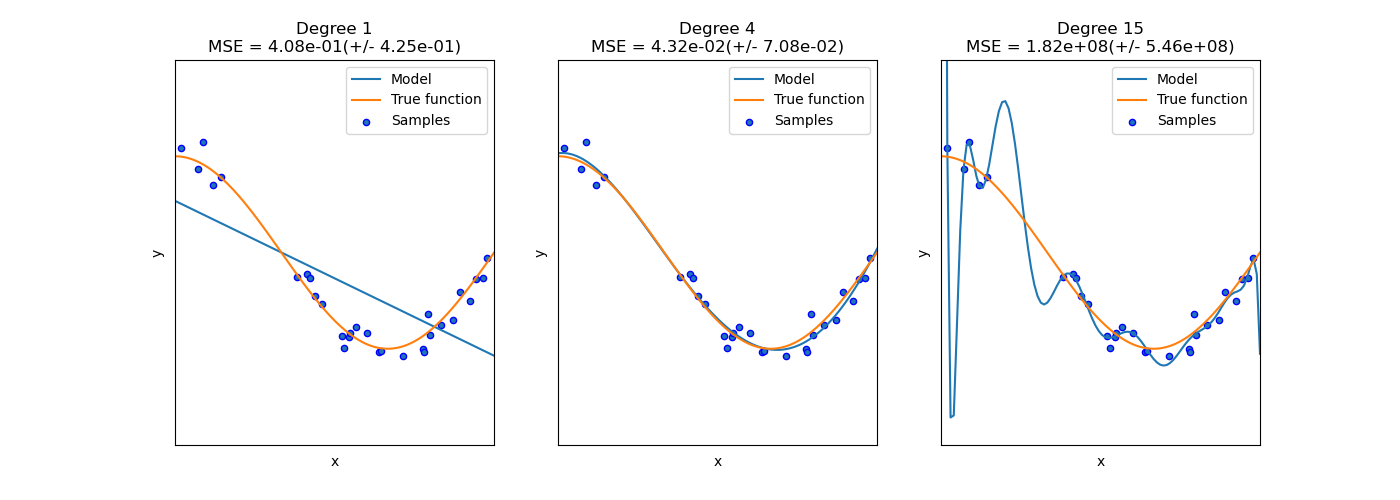

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.547e-04, tolerance: 6.013e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e-03, tolerance: 1.282e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.946e-03, tolerance: 1.223e-03

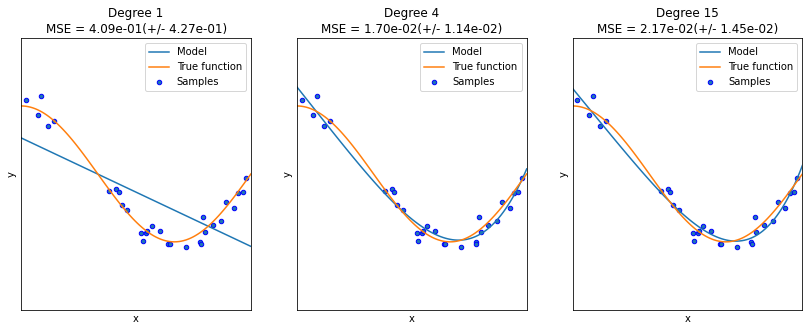

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # linear_regression = LinearRegression()
    linear_regression = Lasso(alpha=1e-3)

    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

In [ ]:
linear_regression.coef_

array([-4.11900688, -0.        ,  0.        ,  1.88779459,  1.09926306,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

**Способы борьбы с переобучением**

*   Сокращение размера модели: уменьшение количества параметров модели снижает ее способность к переобучению
*   Регуляризация: добавление дополнительных ограничений на веса модели, чтобы заставить ее быть менее сложной и предотвратить переобучение.

* Увеличение размера обучающей выборки: добавление дополнительных данных может улучшить обобщающую способность модели.
способность к переобучению.

* Кросс-валидация


* ### Кросс-валидация


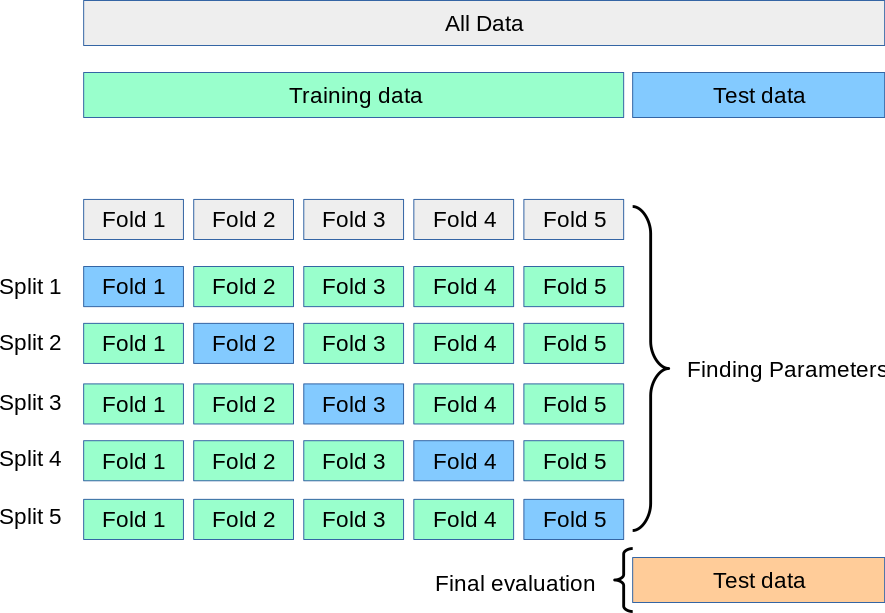

https://scikit-learn.org/stable/modules/cross_validation.html

* # Метод ближайший соседей (kNN, k-Nearest Neighbors)


Метод классификации, который основывается на идее, что объекты с похожими характеристиками образцов должны иметь одинаковые метки классов.


**Алгоритм**:

* Задать количество соседей **k**.
* Измерить евклидово расстояние между объектом, для которого предсказывается класс, и всеми объектами в обучающей выборке.
* Выбрать **k** объектов с наименьшими расстояниями.
* Определить класс предсказываемого образца как класс, который преобладает среди **k** выбранных объектов.


Демонстрация работы: http://vision.stanford.edu/teaching/cs231n-demos/knn/

**Плюсы**:

* Простота и понятность алгоритма, особенно для новичков в области машинного обучения.
* Не требуется предполагать никакой формы распределения данных.
* Метод может эффективно работать с нелинейными и неструктурированными данными.
* Метод может легко поддерживать онлайн-обучение, т.е. добавление новых данных в модель в процессе работы.

**Минусы**:
* Метод является вычислительно дороже по сравнению с другими методами машинного обучения, т.к. все вычисления происходят в процессе классификации.
* Метод может быть чувствителен к выбору параметра k, т.е. выбор неправильного значения k может привести к плохому качеству классификации.
* Метод может быть чувствителен к выбору метрики расстояния

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://www.kaggle.com/code/benhamner/python-data-visualizations

* # Дерево решений (Decision Tree)

https://en.wikipedia.org/wiki/ID3_algorithm

$$ Entropy(X) = -\sum_{i=1}^{N} p_i log_2 p_i $$

**Алгоритм**

1. Выберем признак с наибольшим приростом информации как корень дерева. Прирост информации будем измерять как уменьшение энтропии

2. Разделим данные на основе этого признака. Каждое подмножество будет соответствовать дочернему узлу корневого узла.

3. Продолжаем процесс рекурсивно до тех пор, пока все элементы в дочерних узлах не будут принадлежать одному классу.


**Другие реализации**

* **ID3 (Iterative Dichotomiser 3)** - этот алгоритм был разработан в конце 1970-х годов и основан на энтропии и приросте информации. Он работает только с категориальными данными и не поддерживает пропущенные значения. ID3 строит дерево, рекурсивно разбивая данные по признакам, обеспечивающим наибольший прирост информации.

* **C4.5** - этот алгоритм является расширением ID3 и был разработан в начале 1990-х годов. Он преодолевает ограничения ID3, поддерживая как категориальные, так и непрерывные данные, а также используя эвристический коэффициент усиления, который штрафует признаки с множеством различных значений классов. C4.5 также имеет механизм прунинга, чтобы избежать переобучения.

* **CART (Classification and Regression Trees)** - этот алгоритм был разработан в конце 1980-х годов и похож на C4.5, но с несколькими ключевыми отличиями. В отличие от C4.5, CART поддерживает только бинарное разбиение (т. е. каждый узел в дереве имеет только двух дочерних элементов) и может использоваться как для задач классификации, так и для задач регрессии. CART также использует другой критерий для выбора наилучшего разделения признаков, называемый индексом Джини, который измеряет вероятность неправильной классификации случайно выбранного экземпляра.

https://scikit-learn.org/stable/modules/tree.html